In [1]:
import torch
import os
from PIL import Image
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import *
from torch.utils import data
from torchvision import transforms
from torchvision.models import vgg16
import torch.nn as nn

# dog=1,cat=0

# 加载数据集先定义自己的数据集

In [2]:
#coding:utf8
import os
from PIL import  Image
from torch.utils import data
import numpy as np
from torchvision import  transforms as T
import matplotlib.pyplot as plt
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None,train=True,test=False):
        self.test = test
        imgs = [os.path.join(root,img) for img in os.listdir(root)] 
        # test1: data/test1/8973.jpg
        # train: data/train/cat.10004.jpg 
        if self.test:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2].split('\\')[-1]))
        else:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2]))  
        imgs_num = len(imgs)
        # shuffle imgs
        np.random.seed(100)
        imgs = np.random.permutation(imgs)
        self.imgs = imgs

        if transforms is None:
            if self.test or not train: 
                self.transforms = T.Compose([
                    T.CenterCrop(224),     #T.RandomResizedCrop(n)将给定图像随机裁剪为不同的                          
                    T.ToTensor(),                #比例，然后缩放所裁剪得到的图像为制定的大小
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ]) 
            else :
                self.transforms = T.Compose([
                    T.CenterCrop(224),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ])  
    def __getitem__(self,index):
        '''
        一次返回一张图片的数据
        '''
        img_path = self.imgs[index]
        if self.test: label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
        else: label = 1 if 'dog' in img_path.split('\\')[-1] else 0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label    
    def __len__(self):
        return len(self.imgs)


In [6]:
train_data = DogCat(path,train=True)

In [22]:
print(train_data[1][0].shape)
train_data[1][1]

torch.Size([3, 224, 224])


0

In [11]:
path = r'E:\cats_vs_dogs\catvsdog\train\train'
train_data = DogCat(path,train=True)
train_dataloader = DataLoader(train_data,batch_size=16,shuffle=True,num_workers=0)

In [12]:
x,y = next(iter(train_dataloader))
y
print(x.shape)
print(y.shape)

torch.Size([16, 3, 224, 224])
torch.Size([16])


In [6]:
mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


ValueError: num must be 1 <= num <= 4, not 5

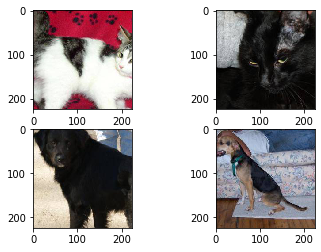

In [15]:
for j,i in enumerate(x):
    i = torch.transpose(i,2, 0)
    i = torch.transpose(i,0, 1)
    print(i.shape)
    plt.subplot(2,2,j+1)
    plt.imshow(i*std+mean)

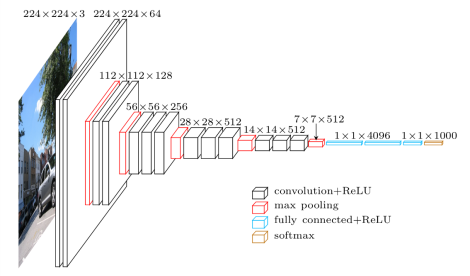

In [6]:
x = torch.randn(1,3,224,224)

In [7]:
D0 = nn.Conv2d(3,64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
D1 = nn.ReLU(True)
D2 = nn.Conv2d(64,64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
D3 = nn.ReLU(True)
D4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [8]:
x1 = D0(x)
x1.shape

torch.Size([1, 64, 224, 224])

In [7]:
vgg16()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
model = vgg16()
model.classifier[6] = nn.Linear(in_features=4096, out_features=2, bias=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
test1 = torch.nn.AdaptiveAvgPool2d(output_size=(7, 7))
a = torch.randn(4,224,224,3)
b = test1(a)
b.shape

torch.Size([4, 224, 7, 7])

In [33]:
torch.nn.Linear?

In [34]:
test2 = torch.nn.Linear(4,224,224*3)

In [9]:
model.classifier.parameters()

<generator object Module.parameters at 0x0000022DC540DCC8>

In [10]:
cost = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.Adam(model.classifier.parameters())
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = nn.DataParallel(model, device_ids=[0,1])
# model.to(device)

In [26]:
for i in range(10):
        correct = 0.0
        total = 25000
        running_loss = 0.0
        accuracy = 0.0
        print('-----epoch', i, '-----')
        for num, image in enumerate(train_dataloader):
            x_train, y_train = image
            optimizer.zero_grad()
            output = model(x_train)
            loss = cost(output, y_train)
            _, predicted = torch.max(output, 1)
            correct += (predicted == y_train).sum().item()
            print(correct)
            print(num*16, '/ 25000', 'loss:', running_loss)
            print(',accuracy:{}%'.format((100*correct/25000)))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('-----------Epoch:', i, ', one_epoch_loss:', running_loss, '-----------',',accuracy:%f'%(100*correct/25000))
torch.save(model, '../log/dog_cat_model_vgg16.pkl')

-----epoch 0 -----
8.0
0 / 25000 loss: 0.0
,accuracy:0.032%
16.0
16 / 25000 loss: 0.67473304271698
,accuracy:0.064%
25.0
32 / 25000 loss: 1.5513372421264648
,accuracy:0.1%
34.0
48 / 25000 loss: 2.4811923503875732
,accuracy:0.136%
42.0
64 / 25000 loss: 3.3814756274223328
,accuracy:0.168%
49.0
80 / 25000 loss: 4.214523553848267
,accuracy:0.196%
53.0
96 / 25000 loss: 4.976449131965637
,accuracy:0.212%


KeyboardInterrupt: 

In [25]:
print('%')

%
